In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# some examples on using pandas to deal with data
# to reformat time format from xH-yH -> x (e.g., 8H-9H -> 8) to enable sorting,
# one can run: %s/\(\d\+)H-\d\+H/\1/g in vim


In [85]:
df = pd.read_csv('../data/validations-sur-le-reseau-ferre-profils-horaires-par-jour-type-1er-sem.csv', sep=';')

In [92]:
df['TRNC_HORR_60']=pd.to_numeric(df['TRNC_HORR_60'],errors='coerce')

In [93]:
df.iloc[4535]

CODE_STIF_TRNS                          100
CODE_STIF_RES                           110
CODE_STIF_ARRET                         836
LIBELLE_ARRET        STRASBOURG-SAINT-DENIS
ID_REFA_LDA                           73633
CAT_JOUR                               JOHV
TRNC_HORR_60                            NaN
pourc_validations                         0
Name: 4535, dtype: object

In [64]:
df.tail()

,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CAT_JOUR,TRNC_HORR_60,pourc_validations
82414,810,802,612,ORSAY-VILLE,62892.0,SAHV,22H-23H,1.95
82415,810,802,612,ORSAY-VILLE,62892.0,SAHV,23H-0H,1.88
82416,810,802,612,ORSAY-VILLE,62892.0,SAHV,6H-7H,2.10
82417,810,802,612,ORSAY-VILLE,62892.0,SAVS,14H-15H,7.03
82418,810,802,612,ORSAY-VILLE,62892.0,SAVS,21H-22H,2.09


In [23]:
df.columns

Index([u'CODE_STIF_TRNS', u'CODE_STIF_RES', u'CODE_STIF_ARRET',
       u'LIBELLE_ARRET', u'ID_REFA_LDA', u'CAT_JOUR', u'TRNC_HORR_60',
       u'pourc_validations'],
      dtype='object')

In [65]:
df['pourc_validations'].head()

0    0.61
1    8.93
2    0.01
3    1.15
4    0.61
Name: pourc_validations, dtype: float64

In [94]:
df.sort_values(by='pourc_validations').tail()

,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CAT_JOUR,TRNC_HORR_60,pourc_validations
4130,800,852,341,GUILLERVAL,59450.0,JOVS,7.0,86.80
5393,800,852,535,MONNERVILLE,59429.0,JOVS,7.0,91.35
4867,800,852,341,GUILLERVAL,59450.0,JOHV,7.0,92.45
5742,800,852,535,MONNERVILLE,59429.0,JOHV,7.0,95.51
80404,800,803,241,DOURDAN-LA-FORET,59843.0,SAVS,16.0,100.00


In [95]:
df.describe()

,CODE_STIF_TRNS,ID_REFA_LDA,TRNC_HORR_60,pourc_validations
count,82419.000000,81967.000000,82405.000000,82419.000000
mean,502.835269,72059.742128,12.130744,4.543808
std,347.290662,31803.342325,6.635162,4.220036
min,100.000000,59403.000000,0.000000,0.000000
25%,100.000000,66484.000000,7.000000,1.330000
50%,800.000000,71124.000000,12.000000,3.980000
75%,800.000000,71777.000000,18.000000,6.770000
max,810.000000,415852.000000,23.000000,100.000000


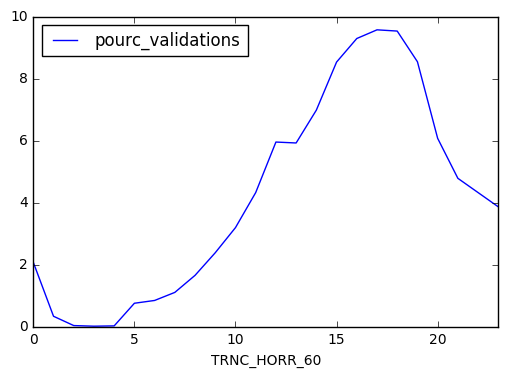

In [125]:
repub = df[df.LIBELLE_ARRET == 'REPUBLIQUE']
repub1 = repub[repub.CAT_JOUR =='DIJFP'].sort_values(by='TRNC_HORR_60')
repub1.plot(x='TRNC_HORR_60',y='pourc_validations')
# repub.sort_values('TRNC_HORR_60')

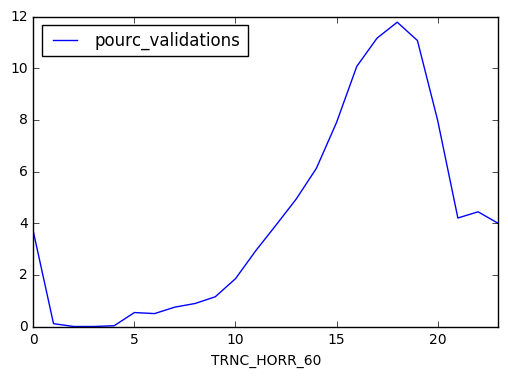

In [144]:
def foo(station, jour):
    df[(df.LIBELLE_ARRET==station) & (df.CAT_JOUR==jour)].sort_values(by='TRNC_HORR_60').plot(y='pourc_validations', x='TRNC_HORR_60')
foo('CHATELET-LES HALLES', 'SAVS')

In [117]:
df.groupby(['LIBELLE_ARRET']).sum().head() #not meaningful, just for testing

,CODE_STIF_TRNS,ID_REFA_LDA,TRNC_HORR_60,pourc_validations
LIBELLE_ARRET,,,,
ABBESSES,11300,8071816.0,1357.0,499.99
ABLON,84000,7303170.0,1347.0,499.99
ACHERES-GRAND-CORMIER,83430,6714570.0,1340.0,499.99
ACHERES-VILLE,90720,8243648.0,1360.0,499.99
AEROPORT CHARLES DE GAULLE 1,93960,8537136.0,1372.0,500.02


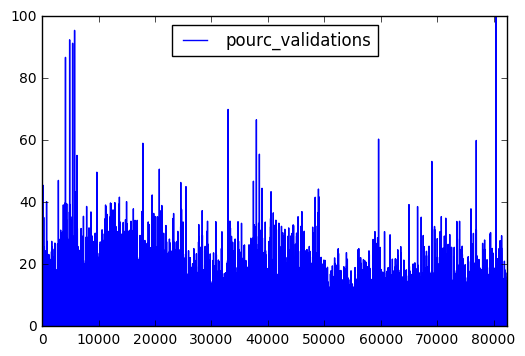

In [62]:
plt.figure();
df['pourc_validations'].plot(); #not meaningful, just for testing
plt.legend(loc='best') 